#  Modelo de Previsão de Falhas em Sistema de ar de Frota de Caminhões

In [444]:
import pandas as pd 
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set()

In [445]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [446]:
from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [278]:
from  sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## Análise dos dados dos anos anteriores

In [292]:
df_ant = pd.read_csv("base_vigente_anos_anteriores.csv")

In [293]:
df_ant.sample(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
25718,neg,1170,2,2130706444,na,0,0,0,0,0,0,66264,19376,17054,0,0,0,7066,0,0,0,826,1196,94564,85706,13844,6290,0,0,0,0,6,42,0,0,0,0,0,0,120,82786,19788,0,196,16,40,832,284,442,100884,0,0,0,59446,17916,10130,4264,2512,2164,2170,1998,632,1462,109276,20,18,12,0,7066,882,4522,9258,na,na,na,na,na,na,na,na,13360,1170.95,109276,109276,110414,404,3502,10696,108700,103168,1209600,0,na,na,na,59186.88,27360.96,15284.16,2,26,0,0,8914,20652,45616,21822,3246,1360,1084,0,na,82,109276,0,1330,58,2820,19072,8870,15308,54426,776,34,0,na,na,na,na,na,na,na,na,na,168,22,0,0,0,0,0,0,1100,27956,1082,188,92,0,0,1980,612,124240,26680,0,0,0,0,170990,1.92,130,44302,9434,4740,1546,4308,5228,5660,27034,442,0,0,0
53077,neg,6290,na,104,92,0,0,0,0,0,0,344,33822,363666,30664,5108,0,183048,0,0,0,0,0,430980,389206,104030,26576,0,0,0,0,108,56,0,0,0,0,0,0,87246,148280,198078,0,958,704,716,2086,165566,263504,70,0,0,0,215406,163964,33352,13234,3428,2004,2088,128,0,0,535186,1248,2502,490,6,183048,5090,68122,35710,na,na,na,na,na,na,na,na,102620,6289.28,535186,535186,536984,1361.0,4676,52626,533540,433604,1209600,13590,0,18,0,372826.56,0,60318.72,0,0,0,0,0,18152,237808,159384,16638,1526,96,0,4,34,535186,na,926,138,968,42568,23492,298782,62854,3766,110,0,156,184,218802,150088,0,2796,0,70,378548,336,60,0,0,0,0,0,0,0,0,2640,2296,526,0,0,12858,2350,1090220,116136,0,0,0,0,5289300,343.64,314,65460,74878,40986,24786,66736,154592,3236,2086,844,0,0,0
771,pos,959094,2,288,266,0,0,0,0,0,0,180878,3527598,1437266,358734,34896,246,34316356,970,0,na,3659866,5410470,60895560,54661178,35672986,8984876,0,0,0,0,104,2,0,0,0,0,0,0,0,737488,4802130,0,4422,4162,6766,30928,59916,5432664,760,0,0,0,2742524,1094932,458854,302584,202882,144236,122362,113206,63432,294606,100221284,6396,7680,3164,16,34316356,1216320,24814532,10835196,460040,448780,439420,429600,457420,436340,431660,467380,433060,959094.61,100221284,100221284,100086130,25709.0,938,na,1022980,78726988,1209600,157164,0,24,0,57966045.12,14783636.16,5992511.04,72,922,0,0,1204,335736,2785566,1476710,511120,344432,82570,2280,20,20,100221284,0,3732,412,1311444,496824,254166,2968300,502452,2288,0,0,660,4,3655756,1520958,0,56038,0,0,3904738,4614,1956,0,0,490,1254026,0,0,0,0,713658,25352,4386,0,0,192112,24912,232740,38322,0,0,0,0,62117860,939.3,892,1705240,922008,790862,256590,566132,1192120,86112,16760,3794,0,0,0
43953,neg,2022,2,62,44,0,0,0,0,0,0,126208,23868,3708,0,0,0,59620,0,0,0,11784,23096,113936,108060,51426,8434,0,0,0,0,148,72,0,0,0,0,0,0,29062,100498,24224,0,538,24,54,474,904,133676,17470,644,0,0,64592,18334,18160,24074,13268,6204,3576,2514,1548,1514,177264,22,70,240,6,59620,1550,17532,32944,na,na,na,na,na,na,na,na,50240,2021.17,177198,177264,178984,845.0,0,16664,176220,154096,1209600,3894,4,14,0,104595.84,6425.28,38068.8,2,64,0,0,24904,36562,18410,17854,53518,251

### Ajustando os dados nulos ao padrão de processamento e visualizando

In [294]:
df_ant.replace(to_replace = 'na', value = np.nan, inplace=True)

<AxesSubplot:>

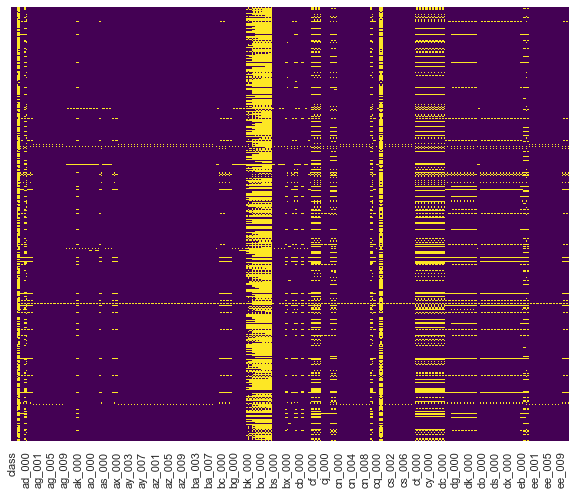

In [283]:
plt.figure(figsize=(10,8))
sns.heatmap(df_ant.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [284]:
df_ant.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [285]:
df_ant.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    class   60000 non-null  object
 1    aa_000  60000 non-null  int64 
 2    ab_000  13671 non-null  object
 3    ac_000  56665 non-null  object
 4    ad_000  45139 non-null  object
 5    ae_000  57500 non-null  object
 6    af_000  57500 non-null  object
 7    ag_000  59329 non-null  object
 8    ag_001  59329 non-null  object
 9    ag_002  59329 non-null  object
 10   ag_003  59329 non-null  object
 11   ag_004  59329 non-null  object
 12   ag_005  59329 non-null  object
 13   ag_006  59329 non-null  object
 14   ag_007  59329 non-null  object
 15   ag_008  59329 non-null  object
 16   ag_009  59329 non-null  object
 17   ah_000  59355 non-null  object
 18   ai_000  59371 non-null  object
 19   aj_000  59371 non-null  object
 20   ak_000  55600 non-null  object
 21   al_000  59358 non-null  object
 2

In [295]:
#Descartando a coluna com proporção muito grande de dados nulos
df_ant.drop('ab_000', axis=1, inplace=True)

In [296]:
#Padronizando os dados de classificação
d = {'neg': '0', 'pos': '1'}
df_ant["class"].replace(d, inplace=True)

In [297]:
df_ant.sample(5)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
36774,0,83024,2130706432,122,0,0,0,0,0,0,2938,353076,3648400,1095078,33998,2538,2206286,0,0,0,0,0,4817366,4252760,930634,491318,0,0,0,0,174,78,0,0,0,0,0,93374,1528712,2890816,623126,0,4182,1620,2464,7192,448126,4671950,494,0,0,0,1659068,1310074,504030,425382,355522,303330,415676,162946,0,0,5748702,22,208,200,28,2206286,69138,689774,239764,200740,164440,197480,243740,NaN,NaN,NaN,NaN,116280,83023.15,5748702,5748702,5776630,31762,632,86612,900260,5136028,1209600,141470,2,68,0,4677497.28,0,453669.12,2,728,0,0,0,7572,1757732,2782308,536506,42780,8832,298,0,8,5748702,NaN,7938,980,108852,299000,188502,3687826,832190,10672,68,0,148,240,4643214,52676,0,1292,0,0,4708710,2338,192,0,0,0,0,0,0,0,0,42462,118856,31100,0,0,145162,24096,14375200,1440590,0,0,0,0,43303830,2066.3,2178,484446,732310,840970,500352,983558,706690,412358,210240,257706,7398,0,0
41648,0,121066,2130706432,800,0,0,0,0,0,0,674448,4406682,1783040,122270,10798,158,3234760,0,0,0,2922,4968,6337724,5583578,1929608,606810,0,0,0,0,980,1492,0,0,0,0,0,0,31952,1509610,5455834,0,9236,9062,13796,24188,48434,5753582,1139098,0,0,0,2769988,1381564,777174,493704,360000,282928,218016,206606,172366,335050,8271548,1454,5624,1282,30,3234760,86666,1328576,596518,256440,367180,315380,308740,178640,243420,NaN,NaN,246340,121066.72,8271548,8271548,8162198,38108,598,90288,999320,7041512,1209600,219226,2,138,0,6053363.52,0,980677.44,280,2050,0,0,15624,378922,1659492,2648994,1468894,637548,177704,10218,862,908,8271548,0,10652,1248,540390,450960,269762,5162250,539198,22818,118,0,650,2656,5431928,1672484,0,11894,0,0,6116106,7200,1374,0,0,0,0,0,0,0,0,42504,46598,22644,16915728,2186104,182760,37520,43622020,4453876,7323570,74652,0,0,37502820,31.78,2944,1036060,832554,537626,200264,515446,746286,519378,2463044,146546,192,0,0
21519,1,1032712,564,564,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29469914,0,52,NaN,2226,3164,51048734,44946430,8198900,5317326,0,0,2904,0,242,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59253796,2374,54,2822,64,29469914,707610,3838040,4338944,240740,211540,231740,275060,229020,264200,281460,278100,232940,1032712.5,59253796,59253796,5621234,39206,82,NaN,1108840,5467246,1209600,131554,1396,360,0,50815407.36,0,6812172.48,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,59253796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,300,4436166,400878,0,11048,0,0,4475214,3128,36,0,0,0,0,0,0,0,0,413462,51184,14258,0,0,159772,34562,6920,700,5615798,20114,0,0,0,2551.56,1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
45188,0,2472,NaN,NaN,0,0,0,0,0,0,544,61652,89870,7144,0,0,47488,0,0,NaN,0,0,127396,106520,56704,12924,0,0,0,0,0,0,0,0,0,0,0,6422,99682,14778,38328,0,2184,648,772,478,7952,147170,6,0,0,0,91622,46428,13584,5200,1014,498,616,248,0,0,184176,18,5

### Tratamento de dados nulos substituindo pela média

In [298]:
for _ in df_ant.columns:
        df_ant[_] = df_ant[_].astype(np.float32)

In [299]:
for _ in df_ant.columns[1:170]:
        m = df_ant[_].mean()
        df_ant[_].fillna(m, inplace=True)

In [432]:
## Transformando os dados em inteiros para processamento

In [300]:
for _ in df_ant.columns:
        df_ant[_] = df_ant[_].astype(np.int32)

In [301]:
df_ant.sample(20)

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
10092,0,78474,2130706432,342,0,0,0,0,0,0,149708,2330588,2164180,536634,51252,824,2220498,0,70,0,224,272,4643246,3936070,840136,595160,0,0,0,0,790,236,0,0,0,0,0,199572,3994128,1026832,12654,0,3952,776,1252,12326,2244900,2962660,7318,2,0,0,1754960,1290156,452318,363836,302558,256820,337466,462896,12176,0,5484720,38,56,408,26,2220498,59298,423634,413156,151360,174200,192920,232600,513152,551393,582877,604893,78220,78473,5484720,5484720,5453474,34469,48,56836,633300,5233186,1209600,186004,2,88,0,4552063,289722,386400,0,0,0,0,15156,872142,2185160,1819220,305680,30112,5584,132,44,48,5484720,37,9128,1196,116924,248620,158498,3225778,1430632,42276,134,0,640,648,4571736,40020,0,194092,0,92,4590276,3176,440,0,0,10,289806,0,0,0,0,38310,113230,40556,0,0,159446,22884,14107680,1412008,0,0,0,0,1226540,2159,2372,713080,1037788,687970,356250,743760,569266,450818,299446,369942,4866,0,0
15844,0,32144,0,190604,0,0,0,0,0,0,2154,58790,1367234,778938,84708,9728,1182730,0,200,0,0,0,2017268,1737850,609914,219380,0,0,0,0,0,0,0,0,0,0,0,10010,746408,1495058,50076,0,3380,1732,2466,8328,66688,2216628,2322,6,2,0,847790,446970,194882,150750,125552,116690,147386,271376,156,0,2627820,154,80,2042,68,1182730,37802,385230,223166,220300,332020,399606,463714,513152,551393,582877,604893,51620,32144,2627820,2627820,2615624,16608,155320,16398,200680,2301552,1209600,0,190221,91,0,1910953,0,387125,4,286,0,0,0,15026,335560,1115500,780638,50510,4156,162,190508,0,2627820,37,5178,528,67584,241930,167866,1476104,331616,10670,76,0,749,1222,1928784,351494,274,19373,7,13,2200715,1824,78,0,0,0,0,0,0,0,0,21394,18840,3064,0,0,70860,10798,4475200,916182,0,0,0,0,31144660,1212,1198,401724,491920,290014,128420,309942,292222,126198,67604,157944,35564,0,0
1270,0,2942,1282,924,0,0,0,0,0,0,36046,126576,103344,19780,0,0,123006,0,0,0,3050,6082,252712,204828,72822,33972,0,0,0,0,476,1502,0,0,0,0,0,5200,260314,5974,14258,0,674,172,188,748,65236,199598,19124,6,0,0,169002,77428,17828,7430,4408,4610,5008,32,0,0,328810,0,10,148,0,123006,5066,26200,46160,280431,321354,399606,463714,513152,551393,582877,604893,71080,2942,328810,328810,331066,872,862,31574,326880,285746,1209600,13854,0,30,0,210569,0,74319,0,0,0,0,8994,105224,98162,56268,15182,1460,432,24,4,14,328810,37,1246,138,8058,32038,15458,123122,92398,13054,230,4,1228,3724,190734,57532,0,1412,0,10,216472,700,198,0,0,0,0,0,0,0,0,3000,1322,272,0,0,8760,1902,76400,10968,0,0,0,0,1943060,418,442,82216,69866,30918,11902,23920,65534,1118,168,104,0,0,0
38685,0,16,8,2,0,0,0,0,0,0,10,330,7524,0,0,0,3110,0,72,0,0,0,15718,13540,6748,380,0,0,0,0,6,0,0,0,0,0,0,0,0,0,7864,0,1208,6,8,4,10,4042,2586,0,0,0,5786,834,80,264,76,632,102,84,6,0,22480,0,8,0,0,3110,170,4996,1742,280431,321354,399606,463714,513152,551393,582877,604893,6580,15,22480,22480,23266,24,18,2146,22260,7908,1209600,280,0,0,0,2825,0

## Feature Selection

In [302]:
#Mapa geral de correlações entre as colunas
df_ant.corr()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.000000,0.536978,-0.026894,0.001663,0.007020,0.018338,0.012342,0.191058,0.339908,0.432974,0.371520,0.448148,0.368319,0.241747,0.112871,0.072053,0.513857,0.118503,0.023965,0.012554,0.365939,0.372067,0.513102,0.509517,0.504655,0.520538,0.142651,0.043180,0.136219,0.091184,0.127756,0.115712,0.156680,0.111621,0.165138,0.190550,0.179528,0.212061,0.232075,0.302714,0.409748,0.042339,0.201837,0.263724,0.145837,0.119417,0.358716,0.432010,0.088571,0.203337,0.046233,0.002525,0.430622,0.437650,0.423971,0.459335,0.477714,0.451409,0.393959,0.336160,0.242693,0.224090,0.531639,0.187004,0.182840,0.123689,0.173928,0.511639,0.486708,0.421027,0.514769,0.063894,0.024206,-0.020095,-0.054382,-0.081038,-0.102786,-0.121391,-0.131631,0.183465,0.534525,0.530241,0.530241,0.505315,0.500048,0.159154,0.036305,0.063423,0.512608,-0.039143,0.198245,0.001661,0.091385,0.008404,0.550555,0.306930,0.464379,0.162147,0.314831,0.231792,0.390611,0.367693,0.405934,0.473741,0.371079,0.194974,0.187385,0.184779,0.106164,0.001673,0.052857,0.530241,0.031691,0.353191,0.307080,0.372309,0.391573,0.437431,0.441946,0.229513,0.057106,-0.000091,-0.000544,0.037277,0.079282,0.240213,0.215450,0.051898,0.028699,-0.001328,-0.008879,0.242051,0.285006,0.195717,0.088828,0.133568,0.030588,0.168194,-0.000568,0.013597,-0.001619,0.004598,0.482844,0.281226,0.264368,-0.016468,0.157223,0.330358,0.331820,0.165073,0.197299,0.148559,0.108859,0.030982,0.008197,0.162493,0.309266,0.347576,0.415214,0.363600,0.444017,0.428946,0.416125,0.485774,0.415235,0.160169,0.235277,0.115802,0.013650,0.012809
aa_000,0.536978,1.000000,-0.020777,0.003533,0.045879,0.066787,0.018541,0.142624,0.284759,0.493699,0.605430,0.778481,0.670832,0.479822,0.212995,0.072064,0.899602,0.140101,0.063367,0.024230,0.495552,0.498243,0.905785,0.911501,0.813890,0.771729,0.151895,0.067352,0.069809,0.043330,0.134568,0.206987,0.057666,0.028995,0.099422,0.111876,0.163423,0.268842,0.474542,0.645530,0.593299,0.017904,0.259230,0.344064,0.217571,0.169825,0.625851,0.739213,0.170366,0.173850,0.066350,0.019804,0.659676,0.795778,0.811733,0.824303,0.811737,0.760060,0.686673,0.619315,0.435950,0.377061,0.906276,0.291721,0.333985,0.291642,0.264927,0.898474,0.828423,0.796969,0.728913,-0.006641,-0.055991,-0.133397,-0.186398,-0.221433,-0.249551,-0.268163,-0.279826,0.277614,0.998720,0.904028,0.904028,0.835288,0.844528,0.305142,0.145201,0.204178,0.832472,-0.041773,0.389299,0.003526,0.215440,0.007671,0.963123,0.273091,0.701082,0.157219,0.443241,0.151923,0.389586,0.551449,0.697440,0.793677,0.665542,0.408221,0.334618,0.297380,0.173495,0.003551,0.139076,0.904028,0.068001,0.648319,0.518384,0.535546,0.568225,0.647294,0.815833,0.459677,0.151425,0.019926,0.020504,0.062445,0.150372,0.502442,0.451022,0.045262,0.078241,0.017681,0.042003,0.504786,0.462927,0.255346,0.033267,0.052892,0.009776,0.129836,-0.

In [305]:
#Seleção da correlação com os eventos de manutenção
c = pd.DataFrame(df_ant.corrwith(df_ant['class']))
c

,0
class,1.000000
aa_000,0.536978
ac_000,-0.026894
ad_000,0.001663
ae_000,0.007020
...,...
ee_007,0.160169
ee_008,0.235277
ee_009,0.115802
ef_000,0.013650


In [434]:
''' Seleção das colunas com correlação minimamente significativa
O valor foi otimizado após testes, de 0.5 a 0.2, incluindo mais colunas com menor correlação 
A partir daí havia maior incidência de falsos positivos, tornando o modelo sensível demais '''

df = pd.DataFrame(df_ant['class'])

for i in df_ant.columns:
    if c[0][i] > 0.2:
        df[i] = df_ant[i]

df.tail()

,class,aa_000,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ah_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ay_005,ay_006,ay_007,ay_008,az_000,az_001,az_004,az_005,az_007,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bg_000,bh_000,bi_000,bj_000,bt_000,bu_000,bv_000,bx_000,by_000,cc_000,ci_000,cj_000,ck_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cv_000,cx_000,dc_000,dd_000,dn_000,do_000,dp_000,ds_000,dt_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_008
59995,0,153002,0,2564,59100,1603216,6015982,1968266,4880368,1224,2114,8913782,7998174,1929126,776370,45114,2533260,2542338,4705948,7620,3470,60160,9737500,0,3245782,2124728,917904,744468,580332,446850,496786,1264596,5214,0,10845228,4880368,129760,1244058,678792,153001,10845228,10845228,10850870,71618,9826660,8289544,0,1529548,2360,0,860,16808,404890,3156012,5101686,10845228,12450,1270,138036,1107360,425276,5875496,2230222,1760956,23486,1872932,4936,62846,137050,27546,265640,54496,2912,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,898642
59996,0,2286,0,0,104,99186,36564,128,56982,0,0,123604,108768,24020,11622,4610,99120,11292,20960,1238,28,276,134204,0,44228,60952,17376,8610,2990,1048,592,186,0,0,147638,56982,1900,14404,9572,2285,147638,147638,150094,525,135982,123344,0,11387,28,0,0,0,61572,63554,10126,147638,1340,32,3606,9664,2112,40190,75776,123730,66850,124152,114,1066,808,600,2450,510,80,82,13934,15024,10578,6760,21126,68424,136,0
59997,0,112,0,0,28,11592,11538,0,8784,0,0,29698,23762,13970,874,0,0,704,22454,782,524,924,13632,0,18542,2236,856,490,162,424,234,158,20,36,43738,8784,480,7640,6224,112,43738,43738,44562,83,23310,7518,4221,10493,96,0,0,0,3956,14690,4040,43738,1034,24,72,518,5348,14382,1772,8864,2482,8864,148,622,0,0,162,58,2,134,15876,2740,792,386,452,144,146,0
59998,0,80292,0,0,330,202498,3251010,2061456,2634394,0,0,4543410,3227856,1615634,1214970,119742,4445146,1370596,0,5518,4092,940376,4970242,0,2154166,1022460,385878,287818,239818,265302,552874,1027168,0,0,6159728,2634394,105862,580084,1032454,80292,6159728,6159728,6092764,50665,5935484,4776506,106006,1048805,1254,0,0,0,11460,760936,3250610,6159728,7380,868,333922,700650,388092,3174954,1312814,2200048,114978,4858834,5598,79230,37162,18388,166748,40564,1659,1908,1180714,1709450,699352,222654,347378,225724,194440,802280
59999,0,40222,0,0,1226,46284,1901140,855376,1235850,0,0,2502090,2109168,573660,334864,105702,1433988,1205298,127100,3298,2162,2115972,527578,0,1035916,485312,271670,244150,220858,197840,224530,191788,24,0,3076406,1235850,37110,310028,260378,40221,3076406,3076406,3075902,20954,2872088,2480114,0,389530,0,0,0,0,32,497028,1708490,3076406,4526,562,81228,195104,284388,2064878,233308,2453708,9240,2506446,2116,21454,25034,4644,79872,14390,1035,1256,409798,686416,440066,183200,344546,254068,225148,170384


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   60000 non-null  int32
 1   aa_000  60000 non-null  int32
 2   ag_002  60000 non-null  int32
 3   ag_003  60000 non-null  int32
 4   ag_004  60000 non-null  int32
 5   ag_005  60000 non-null  int32
 6   ag_006  60000 non-null  int32
 7   ag_007  60000 non-null  int32
 8   ah_000  60000 non-null  int32
 9   al_000  60000 non-null  int32
 10  am_0    60000 non-null  int32
 11  an_000  60000 non-null  int32
 12  ao_000  60000 non-null  int32
 13  ap_000  60000 non-null  int32
 14  aq_000  60000 non-null  int32
 15  ay_005  60000 non-null  int32
 16  ay_006  60000 non-null  int32
 17  ay_007  60000 non-null  int32
 18  ay_008  60000 non-null  int32
 19  az_000  60000 non-null  int32
 20  az_001  60000 non-null  int32
 21  az_004  60000 non-null  int32
 22  az_005  60000 non-null  int32
 23  az_007  600

In [231]:
df.head()

,class,aa_000,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ah_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,ay_005,ay_006,ay_007,ay_008,az_000,az_001,az_002,az_004,az_005,az_007,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bf_000,bg_000,bh_000,bi_000,bj_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,cc_000,ci_000,cj_000,ck_000,cm_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cv_000,dc_000,dd_000,de_000,dn_000,do_000,dp_000,ds_000,dt_000,du_000,dv_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008
0,0,60,0,2682,4736,3862,1846,0,3976,1520,2374,11516,9480,111258,470,0,0,0,0,13124,1956,434,76,190,6198,2948,8762,2566,480,380,196,516,86,66,74,0,124340,0,3976,318,107662,3458,110980,59,124340,124340,184970,54,686,13196,5913,0,5851,30,2,5512,4674,1388,1508,38,4,0,124340,1550,14,36,26,920,430,7650,5336,6598,70,112,340,0,0,232,66,780,882,465,90,7502,3156,1098,138,412,654,78,88,0
1,0,82,0,0,748,12594,3636,0,5244,0,0,23174,18166,23686,1270,0,0,0,692,16286,280,44,50,866,3362,0,12564,1756,638,276,172,132,812,308,192,128,46894,0,5244,360,20520,3134,23320,81,46894,46894,48324,68,0,17050,7224,0,7768,42,0,4,7064,6200,2452,1246,12,0,46894,2202,28,114,350,700,1708,9622,7802,7918,78,40,352,0,0,200,62,37580,3756,2,102,10040,3310,1068,276,1620,116,86,462,0
2,0,66002,0,199486,1358536,1952422,452706,25130,1891670,77898,110548,3605894,3291610,959756,286536,0,24286,681260,2808472,474782,22984,894,1162,1856,388700,123828,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,0,1891670,47066,692800,265492,175480,66002,4644422,4644422,4608738,22706,2272,3991552,3594885,0,374649,720,5154,174956,622312,1002504,793938,541734,345896,300806,4644422,24818,964,162660,215004,217930,3038612,322718,3593728,3613906,4218,692,25278,9438,2504,109700,19072,9520,4902,2057,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516
3,0,59816,0,0,123922,984314,1680050,1135268,1772828,1116,2372,3546760,3053176,652616,423374,0,6388,1091104,2930694,2012,3526,904,1426,2663348,1137664,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,16,1772828,51468,331744,316130,100120,59816,4201350,4201350,4203050,29967,26214,4030198,3387773,38633,599624,0,0,14308,475410,1109740,1528024,837114,58942,6220,4201350,6846,810,70090,345884,191284,2454600,926846,2050280,3413978,2924,414,27740,33354,6330,133542,21290,2718360,435370,1541,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662
4,0,1814,0,0,72,17926,82834,3114,48978,0,0,97146,89920,12932,5092,0,11544,73570,3662,15170,126,34,60,10768,92898,0,53558,34620,9824,4552,764,294,192,142,0,0,110094,0,48978,1100,7932,4966,12700,1813,110094,110094,113274,364,330,103946,94319,0,9556,0,0,0,6560,77394,17810,1924,230,28,110094,144,14,86,5532,1792,30864,63436,93820,95372,78,36,538,360,142,1822,344,2140,394,113,52,10216,9958,7646,4144,18466,49782,3176,482,76


<AxesSubplot:>

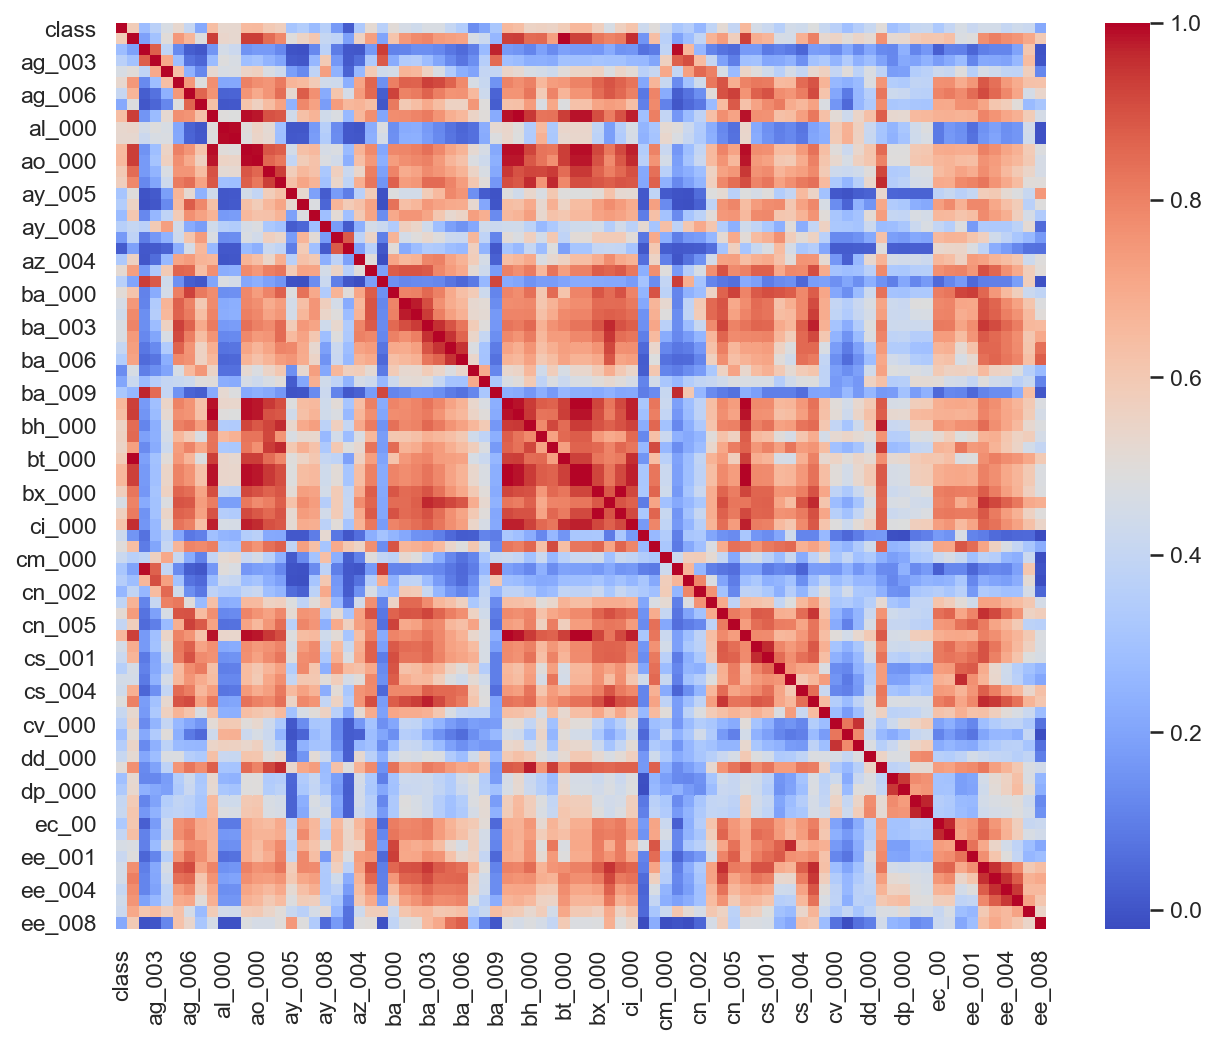

In [308]:
#Visualização do mapa de correlações entre as  colunas selecionadas.
plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(df.sample(800).corr(), cmap="coolwarm")

## Seleção do Modelo de Machine Learning

In [309]:
X = df.drop('class', axis=1)
y = df['class']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [311]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [318]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [ ]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    # treinar o modelo
    x.fit(X_train, y_train)
    
    # gerar predicao
    x_pred = x.predict(X_test)
    
    # gerar score
    acuracia = round(x.score(X_test,y_test)*100,2)
    
    resultados.append({'nome': model['nome'],
                       'score': acuracia,
                       'pred': x_pred })

In [320]:
models = pd.DataFrame(resultados)

In [321]:
models[['nome','score']].sort_values(by='score', ascending=False)

,nome,score
11,RForest,99.29
1,etree,99.27
2,gradboost,99.19
10,Dtree,98.94
3,adaboost,98.93
4,SVC,98.86
5,KNN,98.77
8,LinearSVC,98.16
9,SGD,97.56
7,Perceptron,97.39


In [ ]:
''' O modelo com melhor previsão se mostrou o Random Forest '''

## Validação Cruzada (Cross-Validation)

In [323]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [325]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [327]:
rfc = RandomForestClassifier(n_estimators=200, random_state=123)

In [329]:
resultado = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='f1_macro')

print('O score cross-validado do Random Forest é:', resultado.mean())

O score cross-validado do Random Forest é: 0.8797062096915675


In [330]:
resultado

array([0.85496737, 0.86096146, 0.88212139, 0.82806467, 0.92633187,
       0.87076995, 0.89254978, 0.89224612, 0.91902086, 0.87002862])

In [331]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

In [332]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

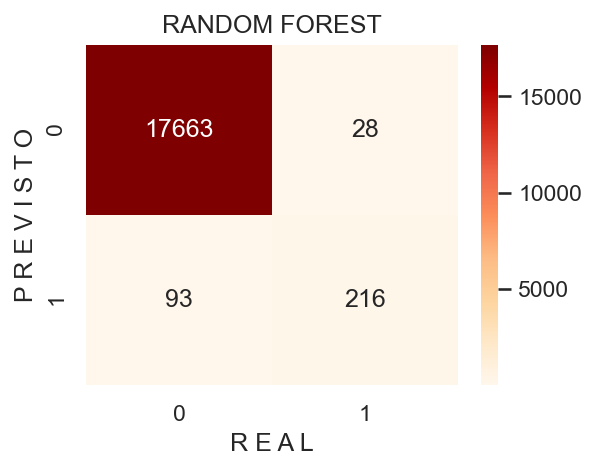

In [468]:
#Matriz de confusão
plt.figure(figsize=(4,3), dpi=150)
sns.heatmap(confusion_matrix(y_test, rfc_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('RANDOM FOREST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [336]:
#Métricas completas do modelo otimizado nos dados de treino (anos anteriores)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17691
           1       0.89      0.70      0.78       309

    accuracy                           0.99     18000
   macro avg       0.94      0.85      0.89     18000
weighted avg       0.99      0.99      0.99     18000



## Curva ROC de comparação com aleatoriedade

In [337]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC=0.500
Random Forest: ROC AUC=0.986


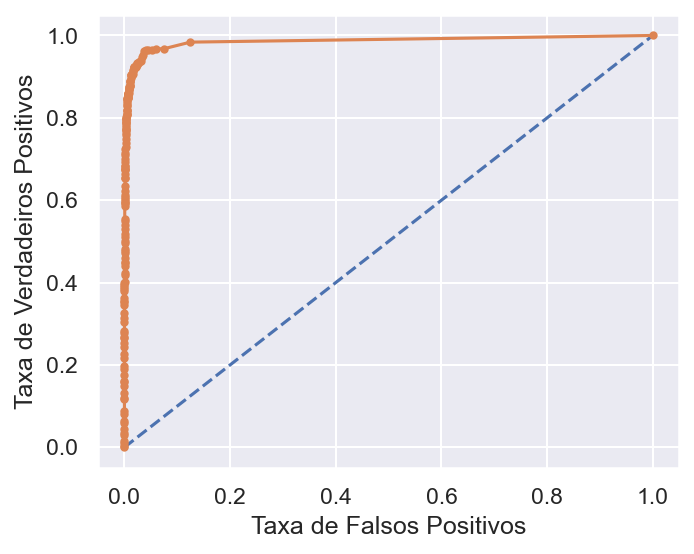

In [472]:
ns_probs = [0 for _ in range(len(y_test))] # no skill

rfc_probs = rfc.predict_proba(X_test)

rfc_probs = rfc_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)

rfc_auc = roc_auc_score(y_test, rfc_probs)

print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('Random Forest: ROC AUC=%.3f' %(rfc_auc))

# calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
rfc_tfp, rfc_tvp, _ = roc_curve(y_test, rfc_probs)

plt.figure(figsize=(5,4), dpi=150)
plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem habilidade')
plt.plot(rfc_tfp, rfc_tvp, marker='.', label='Random Forest')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

plt.show()

## Teste do modelo nos dados de 2020

In [448]:
#Repetição do mesmo processo de filtragem e transformação dos dados

df_2020 = pd.read_csv("base_vigente_2020.csv")
df_2020['aa_000'] = df_2020['aa_000'].astype(str)
df_2020.replace(to_replace = 'na', value = np.nan, inplace=True)
df_2020.drop('ab_000', axis=1, inplace=True)
d = {'neg': '0', 'pos': '1'}
df_2020["class"].replace(d, inplace=True)

for _ in df_2020.columns:
        df_2020[_] = df_2020[_].astype(np.float32)
        
for _ in df_2020.columns[1:170]:
        m = df_2020[_].mean()
        df_2020[_].fillna(m, inplace=True)
        
for _ in df_2020.columns:
        df_2020[_] = df_2020[_].astype(np.int32)

c2 = pd.DataFrame(df_2020.corrwith(df_2020['class']))

df2 = pd.DataFrame(df_2020['class'])

for i in df.columns:
    df2[i] = df_2020[i]

In [449]:
X2 = df2.drop('class', axis=1)
y2 = df2['class']

In [451]:
pred_2020 =  rfc.predict(X2)
print(classification_report(y2,pred_2020))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.93      0.71      0.80       375

    accuracy                           0.99     16000
   macro avg       0.96      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000



In [452]:
print(confusion_matrix(y2,pred_2020))

[[15604    21]
 [  109   266]]


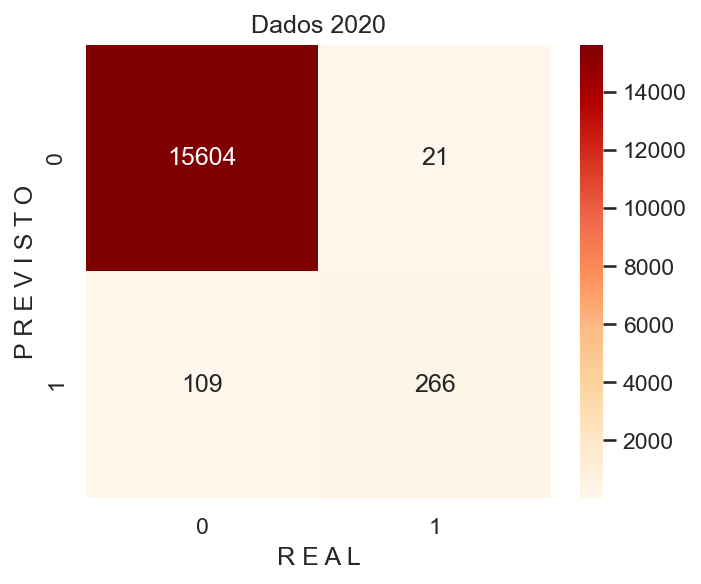

In [474]:
plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(confusion_matrix(y2, pred_2020), cmap='OrRd', annot=True, fmt='2.0f')

plt.title('Dados 2020')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Métricas de precisão do modelo com os dados de 2020

## Previsão de economia

In [454]:
'''como foi atribuído o valor '1' aos positivos e '0' aos negativos, 
    basta somar a coluna para ter o multiplicador de custos para manutenção preventiva.'''

pred_2020.sum()

287

In [484]:
#cálculo do valor e custo dos positivos verdadeiros pelo índice recall
true_pos = pred_2020.sum() * .91 * 25
#cálculo do valor e custo dos falsos positivos
false_pos = pred_2020.sum() * .09 * 10
#cálculo do valor e custo dos falsos negativos
false_neg = 21 * 500

In [516]:
#cálculo do custo total preventivo usando o modelo
custo_prevent = (true_pos + false_pos + false_neg).astype(int)
custo_prevent

17287

In [ ]:
custo_atual = 37000

## Gráfico de resultado final de economia

In [582]:
dados = []

In [592]:
#Preparando os dados para relatório
dados = pd.DataFrame({'US$': [37000, 17287]}, index=["Custo 2020", "Custo Preventivo"])
dados 

,US$
Custo 2020,37000
Custo Preventivo,17287


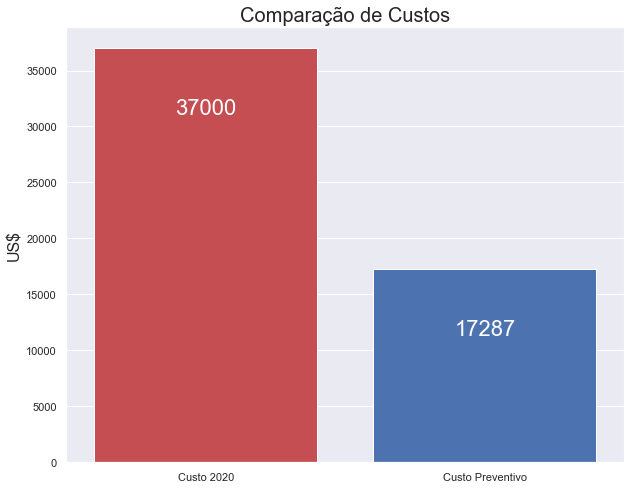

In [699]:
fig = plt.figure(figsize=(10, 8))
plt.ylabel('US$',fontsize=16)
plt.title('Comparação de Custos', fontsize=20)
colors = ["r", "b"]
sns.set_palette(colors, color_codes=True)
    
g = sns.barplot(x=['Custo 2020', "Custo Preventivo"], y="US$", data=dados, saturation=1)

for p in g.patches:
             g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=22, color='white', xytext=(0, -60),
                 textcoords='offset points')